## Experiment 
1. Construct Gleason G[n] and Phi[n] and Dynatomic Polynomials over QQ.
2. Calculate a complex root root of G[n].
3. Calculate MP=(c-root)*(c-root.conjugate()), a Real in RR[c]
4. Construct the quotient ring RR[c]/(MP). Its elements are real linear combinations of x + y*cbar; cbar=Ideal(c+(MP)).
5. Observe those x+y*cbar as points (x,y) in the plane.
6. Observe the orbit as (x,y) points in the plane when f_c^n(0) is calculated in RR[c]/(MP).
7. Compare them to the orbits when c is a complex root (approx).

   It looks like numerical inaccuracies arise for smaller n than when complex orbits are computed.

In [1]:
myR = QQ['c','z']

In [2]:
c,z = var('c,z')

In [3]:
def f(c, z):
    return z^2 + c
def fn(n, c, z):
    if n == 0:
        return z
    else:
        return f(c,fn(n-1,c,z))
def Fn(n, c, z):
    return( fn(n, c, z) - z )

$z$ is periodic of period $n$ for $f(c)$ iff $F_n(n,c,z)=0$.

Lemma: If $m$ divides $n$ then $F_m$ divides $F_n$ in $k[c,z]$.

In [4]:
try: 
    G = load("GleasonsDefined")
    maxn = len(G)-1
    Gex = load("GleasonsExpanded")
    Phi = load("Phis")
    print("Polys loaded from storage")
except:
    print("Polys will be computed and stored")
    maxn = 13
    Phi  = [None for _ in range(maxn+1)]
    G   =  [None for _ in range(maxn+1)]
    Gex =  [None for _ in range(maxn+1)]

    Phi[1] = Fn(1, c, z)
    G[1]   = Fn(1, c, 0)
    Gex[1] = Fn(1, c, 0)


    for nn in range(2, 14): # that is, [2, 3, ..., 13], which takes a couple of minutes.
        result0 = Fn(nn, c, 0)
        resultz = Fn(nn, c, z)
        for div in divisors(nn):
            if div < nn:
                result0 = result0 / G[div]
                resultz = resultz / Phi[div]
        G[nn] = result0
        Gex[nn] = expand(factor(result0))
        Phi[nn] = resultz
        print(nn)
        print(Phi[nn])
        if nn < 8:
            print(Gex[nn])
        else:
            print("Deg G", nn, "is", Gex[nn].coefficients()[-1][1])
        print("\n\n")

    save(G,"GleasonsDefined")
    save(Gex,"GleasonsExpanded")
    save(Phi,"Phis") 


Polys loaded from storage


For cycle length N, compute the roots of G_N(c)=0

In [5]:
N = 6

In [6]:
c = var('c')
solutions = solve([G[N]==0], c, to_poly_solve=True)
solutions

[c == -1.996376039224046,
 c == -1.966773418734988,
 c == -1.907279971024991,
 c == -1.772892883167355,
 c == -1.476014760147601,
 c == (-0.2175267470189307 - 1.114454265875212*I),
 c == (-0.1635982615605271 - 1.097780642879532*I),
 c == (-0.01557038602319046 - 1.020497366497642*I),
 c == (-0.1134186559533513 - 0.8605694725072688*I),
 c == (0.3598927390125933 - 0.6847620202118327*I),
 c == (-0.596891644635018 - 0.6629807445778755*I),
 c == (0.3965345700324243 - 0.6041818104889687*I),
 c == (-1.284084925628917 - 0.4272688961775426*I),
 c == (0.4433256333996235 - 0.3729624166628465*I),
 c == (-1.138000666853823 - 0.2403324014023893*I),
 c == (0.3890068405697711 - 0.2158506508708191*I),
 c == (0.3890068405697711 + 0.2158506508708191*I),
 c == (-1.138000666853823 + 0.2403324014023893*I),
 c == (0.4433256333996235 + 0.3729624166628465*I),
 c == (-1.284084925628917 + 0.4272688961775426*I),
 c == (0.3965345700324243 + 0.6041818104889687*I),
 c == (-0.596891644635018 + 0.6629807445778755*I),
 

In [7]:
CPR.<c> = CC[]
print(CPR)
print(CPR(c))
print(type(CPR(c)))
print(G[4])
print(Gex[4])
myQuot=CPR.quotient(Gex[4])
it0 = myQuot(0)
print(it0)
it1 = f(c, it0)
print(it1)
it2 = f(c, it1)
print(it2)
it3  = f(c, it2)
print(it3)
it4 = f(c, it3)
it4


#CPR.irreducible_element()

Univariate Polynomial Ring in c over Complex Field with 53 bits of precision
c
<class 'sage.rings.polynomial.polynomial_ring.PolynomialRing_field_with_category.element_class'>
(((c^2 + c)^2 + c)^2 + c)/(c^2 + c)
c^6 + 3*c^5 + 3*c^4 + 3*c^3 + 2*c^2 + 1
0
cbar
cbar^2 + cbar
cbar^4 + 2.00000000000000*cbar^3 + cbar^2 + cbar


0

In [8]:
c = var('c')
solve([G[4]==0], c, to_poly_solve=True)

[c == -1.9408,
 c == -1.310702638600652,
 c == (-0.156520166833755 - 1.032247108922832*I),
 c == (0.2822713907669138 - 0.5300606175785254*I),
 c == (0.2822713907669138 + 0.5300606175785254*I),
 c == (-0.156520166833755 + 1.032247108922832*I)]

In [9]:
root=(-0.156520166833755 - 1.032247108922832*I)
rootc=root.conjugate()
MX=var("MX")
MP=(MX-root)*(MX-rootc)
MP.expand()

MX^2 + 0.313040333667510*MX + 1.09003265650521

In [10]:
CPR.<c> = CC[]

In [11]:
myQuot=CPR.quotient(c^2+0.313040333667510*c + 1.09003265650521)

In [12]:
myQuot

Univariate Quotient Polynomial Ring in cbar over Complex Field with 53 bits of precision with modulus c^2 + 0.313040333667510*c + 1.09003265650521

In [13]:
its=[None for _ in range(20)]
its[0] = myQuot(0)
for nit in range(1,20):
    its[nit] = f(c, its[nit-1])
    print(nit, its[nit])

    

1 cbar
2 0.686959666332490*cbar - 1.09003265650521
3 -0.645344925545704*cbar + 0.673769975546684
4 (4.77395900588817e-15)*cbar - 1.66533453693773e-16
5 cbar - 2.48148570759027e-29
6 0.686959666332490*cbar - 1.09003265650521
7 -0.645344925545704*cbar + 0.673769975546684
8 (4.77395900588817e-15)*cbar - 1.66533453693773e-16
9 cbar - 2.48148570759027e-29
10 0.686959666332490*cbar - 1.09003265650521
11 -0.645344925545704*cbar + 0.673769975546684
12 (4.77395900588817e-15)*cbar - 1.66533453693773e-16
13 cbar - 2.48148570759027e-29
14 0.686959666332490*cbar - 1.09003265650521
15 -0.645344925545704*cbar + 0.673769975546684
16 (4.77395900588817e-15)*cbar - 1.66533453693773e-16
17 cbar - 2.48148570759027e-29
18 0.686959666332490*cbar - 1.09003265650521
19 -0.645344925545704*cbar + 0.673769975546684


In [14]:
c = var('c')
solutions = solve([G[6]==0], c, to_poly_solve=True)
solutions

[c == -1.996376039224046,
 c == -1.966773418734988,
 c == -1.907279971024991,
 c == -1.772892883167355,
 c == -1.476014760147601,
 c == (-0.2175267470189307 - 1.114454265875212*I),
 c == (-0.1635982615605271 - 1.097780642879532*I),
 c == (-0.01557038602319046 - 1.020497366497642*I),
 c == (-0.1134186559533513 - 0.8605694725072688*I),
 c == (0.3598927390125933 - 0.6847620202118327*I),
 c == (-0.596891644635018 - 0.6629807445778755*I),
 c == (0.3965345700324243 - 0.6041818104889687*I),
 c == (-1.284084925628917 - 0.4272688961775426*I),
 c == (0.4433256333996235 - 0.3729624166628465*I),
 c == (-1.138000666853823 - 0.2403324014023893*I),
 c == (0.3890068405697711 - 0.2158506508708191*I),
 c == (0.3890068405697711 + 0.2158506508708191*I),
 c == (-1.138000666853823 + 0.2403324014023893*I),
 c == (0.4433256333996235 + 0.3729624166628465*I),
 c == (-1.284084925628917 + 0.4272688961775426*I),
 c == (0.3965345700324243 + 0.6041818104889687*I),
 c == (-0.596891644635018 + 0.6629807445778755*I),
 

In [15]:
root=0.4433256333996235 + 0.3729624166628465*I
rootc=root.conjugate()
MX=var("MX")
MP=(MX-root)*(MX-rootc)
MP.expand()

MX^2 - 0.886651266799247*MX + 0.335638581472168

In [16]:
CPR.<c> = CC[]

In [17]:
myQuot=CPR.quotient(c^2 - 0.886651266799247*c + 0.335638581472168)

In [18]:
myQuot

Univariate Quotient Polynomial Ring in cbar over Complex Field with 53 bits of precision with modulus c^2 - 0.886651266799247*c + 0.335638581472168

In [19]:
its=[None for _ in range(20)]
its[0] = myQuot(0)
for nit in range(1,20):
    its[nit] = f(c, its[nit-1])
    print(nit, its[nit])

1 cbar
2 1.88665126679925*cbar - 0.335638581472168
3 2.88952760395015*cbar - 1.08203649920840
4 2.14983062119496*cbar - 1.63156764150939
5 -1.91728842002650*cbar + 1.11076807160221
6 (2.22044604925031e-15)*cbar - 2.22044604925031e-16
7 cbar - 1.60552216346888e-30
8 1.88665126679925*cbar - 0.335638581472168
9 2.88952760395015*cbar - 1.08203649920840
10 2.14983062119496*cbar - 1.63156764150939
11 -1.91728842002650*cbar + 1.11076807160221
12 (2.22044604925031e-15)*cbar - 2.22044604925031e-16
13 cbar - 1.60552216346888e-30
14 1.88665126679925*cbar - 0.335638581472168
15 2.88952760395015*cbar - 1.08203649920840
16 2.14983062119496*cbar - 1.63156764150939
17 -1.91728842002650*cbar + 1.11076807160221
18 (2.22044604925031e-15)*cbar - 2.22044604925031e-16
19 cbar - 1.60552216346888e-30


In [20]:
its[2].list()

[-0.335638581472168, 1.88665126679925]

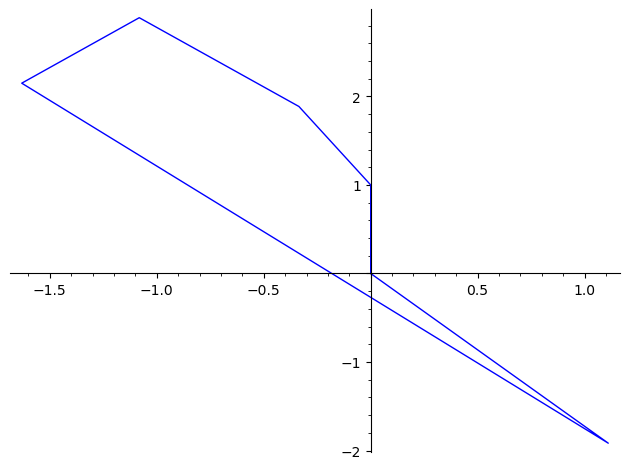

In [21]:
list_plot([its[nn] for nn in range(0,7)], plotjoined=True)

In [22]:
solutions

[c == -1.996376039224046,
 c == -1.966773418734988,
 c == -1.907279971024991,
 c == -1.772892883167355,
 c == -1.476014760147601,
 c == (-0.2175267470189307 - 1.114454265875212*I),
 c == (-0.1635982615605271 - 1.097780642879532*I),
 c == (-0.01557038602319046 - 1.020497366497642*I),
 c == (-0.1134186559533513 - 0.8605694725072688*I),
 c == (0.3598927390125933 - 0.6847620202118327*I),
 c == (-0.596891644635018 - 0.6629807445778755*I),
 c == (0.3965345700324243 - 0.6041818104889687*I),
 c == (-1.284084925628917 - 0.4272688961775426*I),
 c == (0.4433256333996235 - 0.3729624166628465*I),
 c == (-1.138000666853823 - 0.2403324014023893*I),
 c == (0.3890068405697711 - 0.2158506508708191*I),
 c == (0.3890068405697711 + 0.2158506508708191*I),
 c == (-1.138000666853823 + 0.2403324014023893*I),
 c == (0.4433256333996235 + 0.3729624166628465*I),
 c == (-1.284084925628917 + 0.4272688961775426*I),
 c == (0.3965345700324243 + 0.6041818104889687*I),
 c == (-0.596891644635018 + 0.6629807445778755*I),
 

In [23]:
solutions[6].operands()[1]-solutions[25].operands()[1].conjugate()

0.0

In [24]:
(1.0+0.0*I).is_real()

True

In [25]:
solutions

[c == -1.996376039224046,
 c == -1.966773418734988,
 c == -1.907279971024991,
 c == -1.772892883167355,
 c == -1.476014760147601,
 c == (-0.2175267470189307 - 1.114454265875212*I),
 c == (-0.1635982615605271 - 1.097780642879532*I),
 c == (-0.01557038602319046 - 1.020497366497642*I),
 c == (-0.1134186559533513 - 0.8605694725072688*I),
 c == (0.3598927390125933 - 0.6847620202118327*I),
 c == (-0.596891644635018 - 0.6629807445778755*I),
 c == (0.3965345700324243 - 0.6041818104889687*I),
 c == (-1.284084925628917 - 0.4272688961775426*I),
 c == (0.4433256333996235 - 0.3729624166628465*I),
 c == (-1.138000666853823 - 0.2403324014023893*I),
 c == (0.3890068405697711 - 0.2158506508708191*I),
 c == (0.3890068405697711 + 0.2158506508708191*I),
 c == (-1.138000666853823 + 0.2403324014023893*I),
 c == (0.4433256333996235 + 0.3729624166628465*I),
 c == (-1.284084925628917 + 0.4272688961775426*I),
 c == (0.3965345700324243 + 0.6041818104889687*I),
 c == (-0.596891644635018 + 0.6629807445778755*I),
 

In [26]:
def extract_complex_root_list(solutions):
    result = []
    for soln in solutions:
        solnc = soln.operands()[1] # extract complex number for equality expression
        if solnc.is_real():
            continue
        result.append(solnc)
    return result
MX = var("MX")

def list_of_quadrs(rootlist):
    result = []
    for root in rootlist:
        result.append((MX-root)*(MX-root.conjugate()))
    return result

def remove_duplicates(quadrlist):
    return list(set(quadrlist))


#print(solutions,"\n\n")
tmp1 = extract_complex_root_list(solutions)
#print(tmp1,"\n\n")
tmp2 = list_of_quadrs(tmp1)
#print(tmp2,"\n\n")
quadrlist=remove_duplicates(tmp2)
#show(quadrlist)
quadlist_expd = [expand(xxx) for xxx in quadrlist]
#show(quadlist_expd)



In [27]:
quadlist_subs = [foo(MX=c) for foo in quadlist_expd ]
quadlist_subs

[1.00000000000000*c^2 + 0.435053494037861*c + 1.2893261963960954,
 1.00000000000000*c^2 + 0.327196523121054*c + 1.2318867310666253,
 1.00000000000000*c^2 + 0.0311407720463809*c + 1.0416573119495338,
 1.00000000000000*c^2 + 0.226837311906703*c + 0.7534436085297035,
 1.00000000000000*c^2 - 0.719785478025187*c + 0.598421807918577,
 1.00000000000000*c^2 + 1.19378328927004*c + 0.7958231031161308,
 1.00000000000000*c^2 - 0.793069140064849*c + 0.5222753253565278,
 1.00000000000000*c^2 + 2.56816985125783*c + 1.8314328058681972,
 1.00000000000000*c^2 - 0.886651266799247*c + 0.3356385814721681,
 1.00000000000000*c^2 + 2.27600133370765*c + 1.3528051809235848,
 1.00000000000000*c^2 - 0.778013681139542*c + 0.19791782549143153]

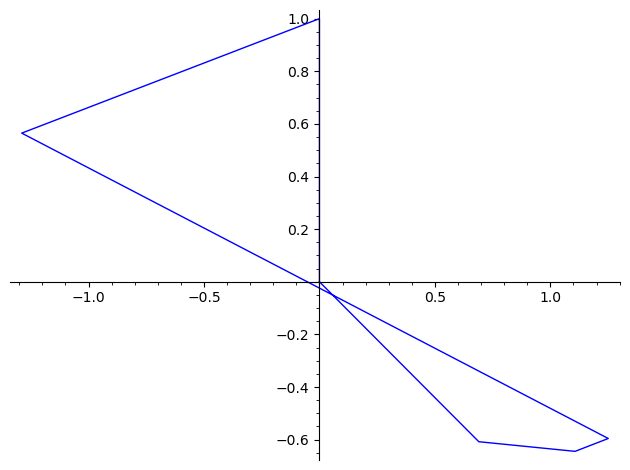

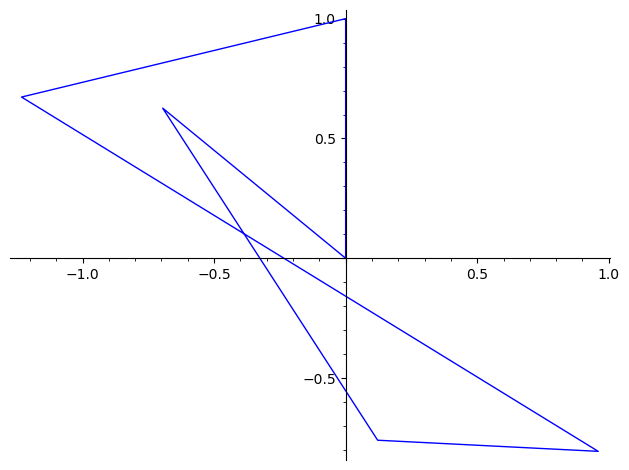

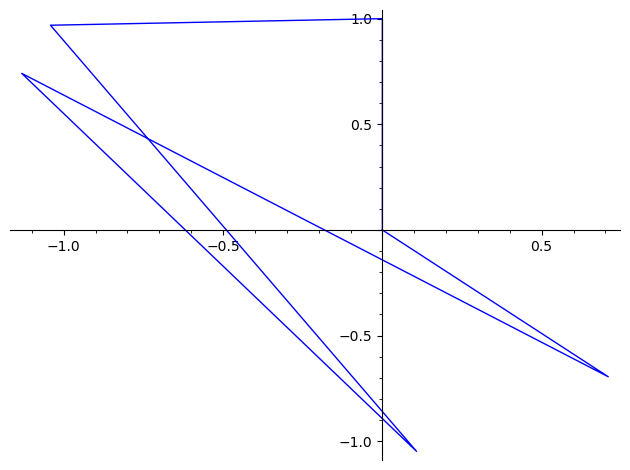

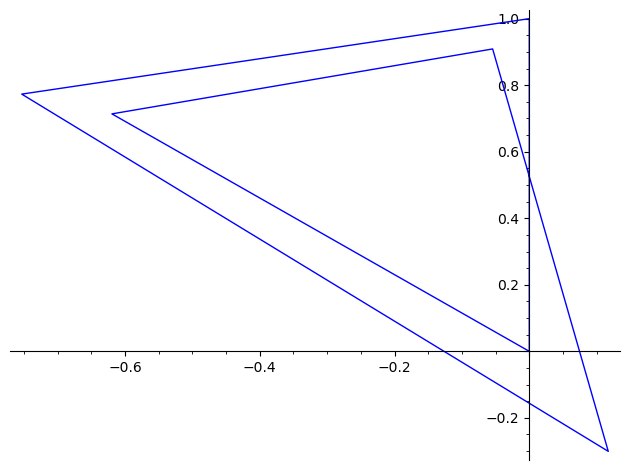

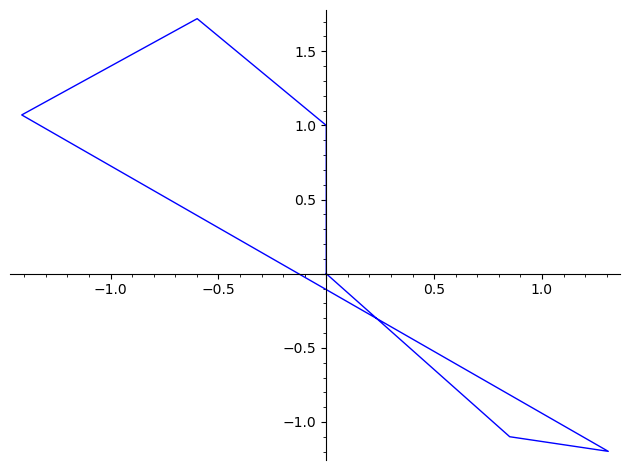

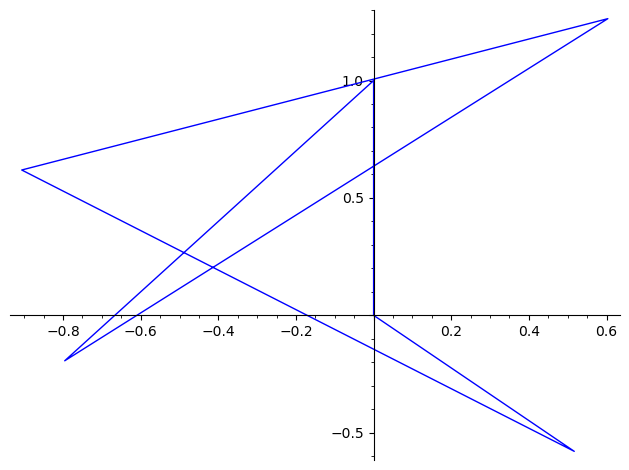

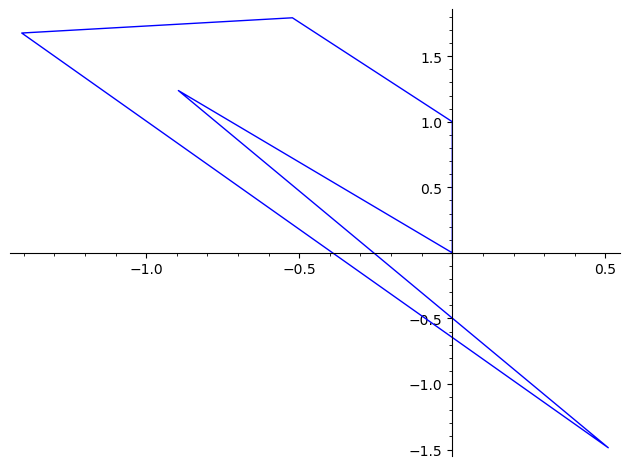

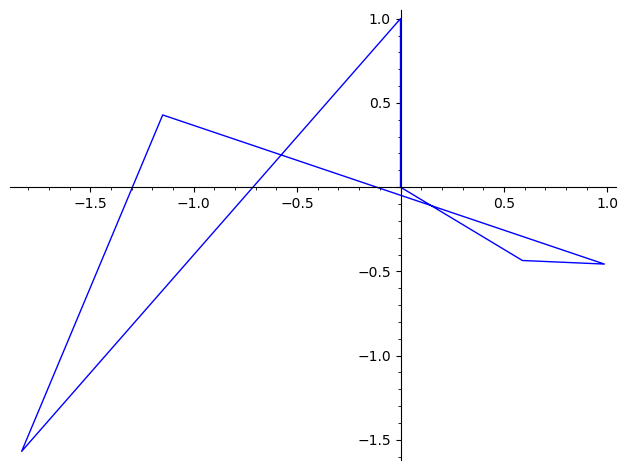

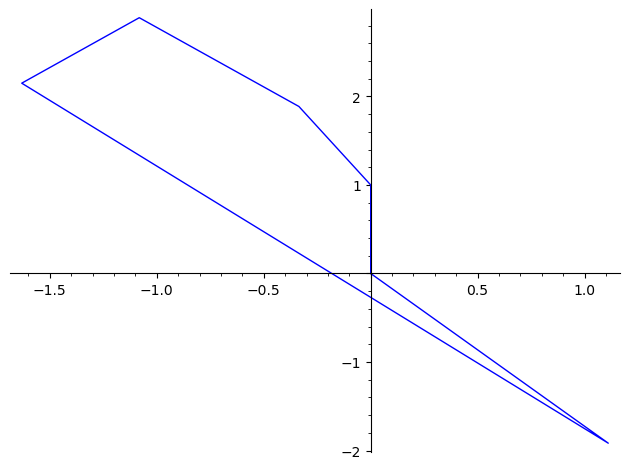

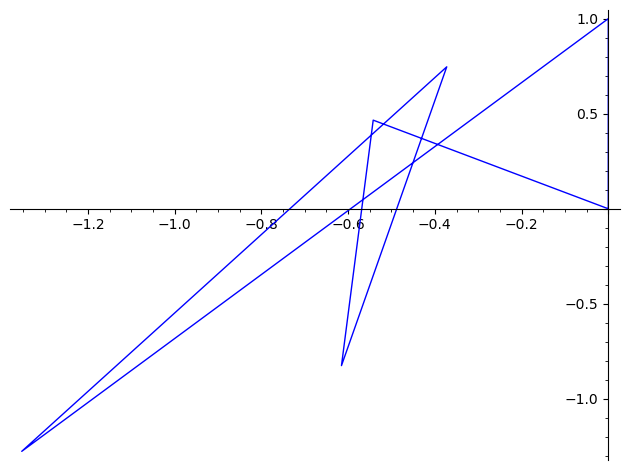

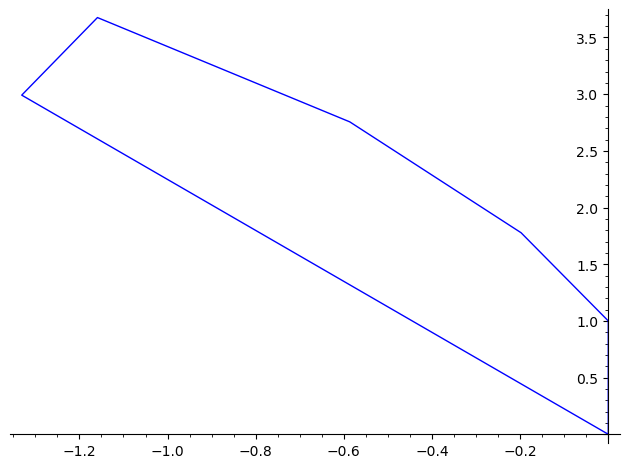

In [28]:
#for quad in quadlist_subs:
for quad in quadlist_subs:
    #print(quad)
    CPR.<c> = CC[]
    #print(CPR)
    myQuot=CPR.quotient(quad)
    #print(myQuot)

    its=[None for _ in range(7)]
    its[0] = myQuot(0)
    #print(its[0])
    for nit in range(1,7):  
        its[nit] = f(c, its[nit-1])
        #print(its[nit])
    #print(its)
    its_list = [its[nn].list() for nn in range(0,7)]
    #print("LIST:", [its[nn].list() for nn in range(0,7)])
    #print("\n")
    #print(its_list)
    #show(list_plot(its_list, plotjoined=True))
    show(list_plot([its[nn].list() for nn in range(0,7)], plotjoined=True))
    
    
    #, plotjoined=True)

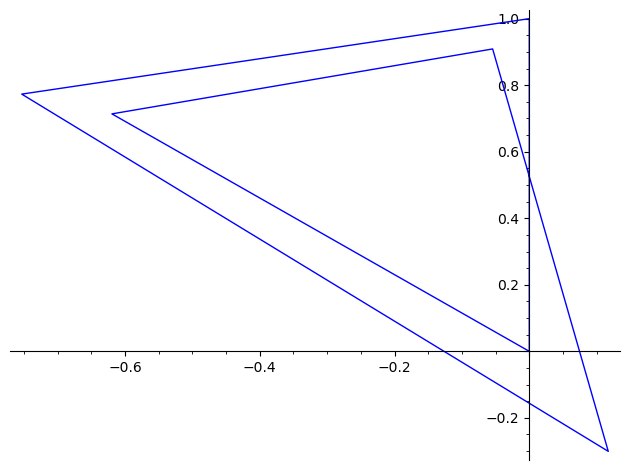

In [29]:
list_plot([[0.000000000000000, 0.000000000000000], [0.000000000000000, 1.00000000000000], [-0.753443608529703, 0.773162688093297], [0.117283342365305, -0.300667902711390], [-0.0543568146954030, 0.908966964440309], [-0.619556225013862, 0.713765164674369], [-2.10923500887361e-11, 8.77331540749537e-12]]
, plotjoined=True)

In [30]:
extract_complex_root_list(solutions)

[-0.2175267470189307 - 1.114454265875212*I,
 -0.1635982615605271 - 1.097780642879532*I,
 -0.01557038602319046 - 1.020497366497642*I,
 -0.1134186559533513 - 0.8605694725072688*I,
 0.3598927390125933 - 0.6847620202118327*I,
 -0.596891644635018 - 0.6629807445778755*I,
 0.3965345700324243 - 0.6041818104889687*I,
 -1.284084925628917 - 0.4272688961775426*I,
 0.4433256333996235 - 0.3729624166628465*I,
 -1.138000666853823 - 0.2403324014023893*I,
 0.3890068405697711 - 0.2158506508708191*I,
 0.3890068405697711 + 0.2158506508708191*I,
 -1.138000666853823 + 0.2403324014023893*I,
 0.4433256333996235 + 0.3729624166628465*I,
 -1.284084925628917 + 0.4272688961775426*I,
 0.3965345700324243 + 0.6041818104889687*I,
 -0.596891644635018 + 0.6629807445778755*I,
 0.3598927390125933 + 0.6847620202118327*I,
 -0.1134186559533513 + 0.8605694725072688*I,
 -0.01557038602319046 + 1.020497366497642*I,
 -0.1635982615605271 + 1.097780642879532*I,
 -0.2175267470189307 + 1.114454265875212*I]